In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import sklearn 

In [2]:
print('python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy: 1.11.3
Pandas: 0.22.0
Matplotlib: 2.2.0
Seaborn: 0.7.1
Sklearn: 0.19.1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# Load The Data
games = pandas.read_csv("games.csv")


In [5]:
# Print the names of the columns in games
print(games.columns)

print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


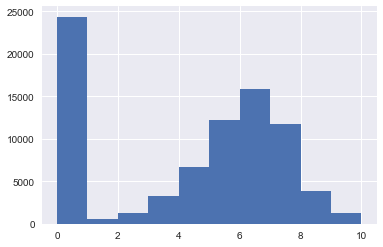

In [6]:
# Make a histogram of all the rating in the average_rating Columns
plt.hist(games["average_rating"])

plt.show()

In [9]:
# Print the first row of all games with zero scores
print(games[games["average_rating"] == 0].iloc[0])

# Print the first row of all games with zero scores greater than 0
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

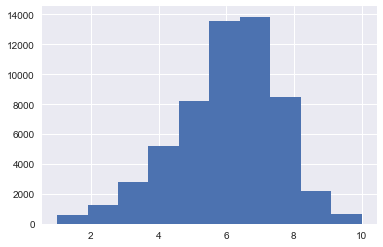

In [10]:
# Removes any rows whithout usre reviews
games = games[games["users_rated"] > 0]

#remove any rows with missing values
games = games.dropna(axis=0)

# Make a histogram of all average ratings

plt.hist(games["average_rating"])
plt.show()

In [11]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


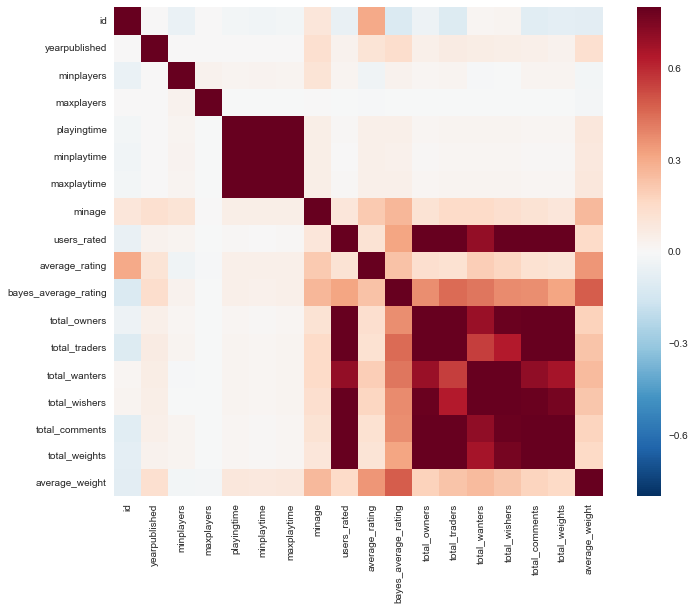

In [12]:
# Corelation matrixs
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [17]:
# Get all the columns from the dataset
columns = games.columns.tolist()

#filter the columns to raemove data we do not want
columns = [c for c in columns if c not in["bayes_average_rating","average_rating","type","id"]]

# Store the variable we'll be predicting on
target = ["average_rating"]

In [18]:
# Generate training and test dataset
from sklearn.model_selection import train_test_split

# Generate traning set
train = games.sample(frac=0.8, random_state = 1)

# Select anything not in the traning set and put in test
test = games.loc[~games.index.isin(train.index)]

# Print shape
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [25]:
# Import Leniar regrassion model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
LR = LinearRegression()

# Fit the model the training data
LR.fit(train[columns], train[target])

ValueError: could not convert string to float: "Monopoly: Boston Celtics Collector's Edition"

In [26]:
# Generate predictions for the test set
predictions = LR.predict(test[columns])

# Compute error between our test predictions and actual value
mean_squared_error(predictions, test[target])

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
# Import Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model class
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state = 1)

# Fit the model the training data
RFR.fit(train[columns], train[target])

In [ ]:
# Make predictions
predictions = RFR.predict(test[columns])

# Compute the error between our test predictions and actual values
mean_squred_error(predictions, test[target])

In [ ]:
test[columns].ioc[0]

In [ ]:
# Make prediction with both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1, -1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))

# Print out the predictions
print(rating_LR)
print(rating_RFR)

In [ ]:
test[target].iloc[0]